[An Introduction to Directed Acyclic Graphs](https://cran.r-project.org/web/packages/ggdag/vignettes/intro-to-dags.html)

Install "ggdag" pkg in RStudio
```
install.packages("ggdag")
```

In [1]:
library(ggdag)

Warning message:
"package 'ggdag' was built under R version 3.5.2"Loading required package: ggplot2
Warning message:
"package 'ggplot2' was built under R version 3.5.2"
Attaching package: 'ggdag'

The following object is masked from 'package:ggplot2':

    expand_scale

The following object is masked from 'package:stats':

    filter



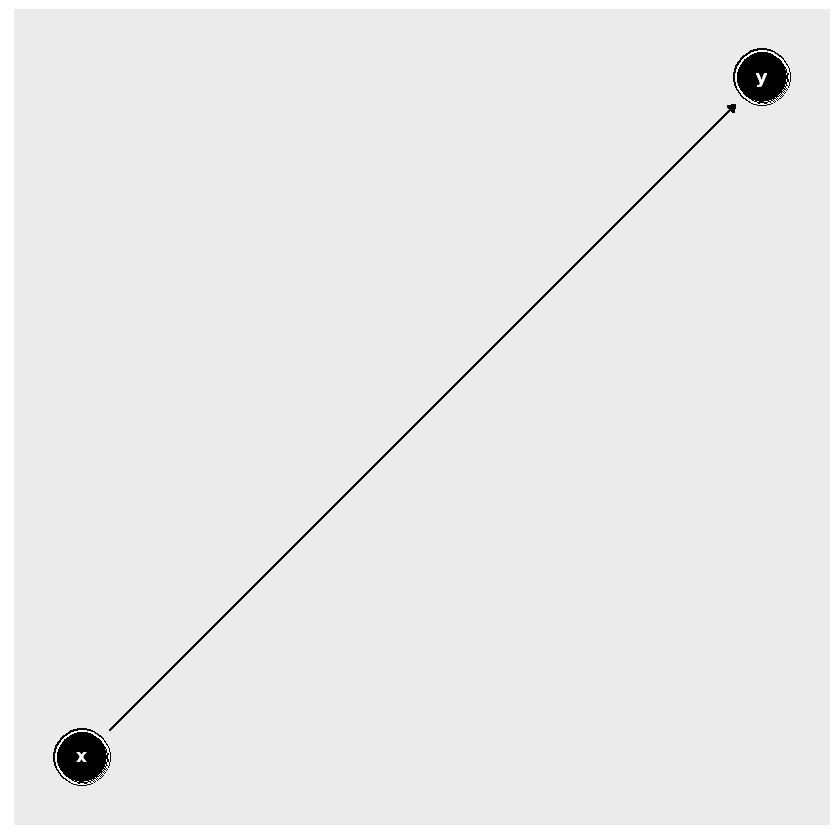

In [2]:
dagify(y ~ x) %>% ggdag()

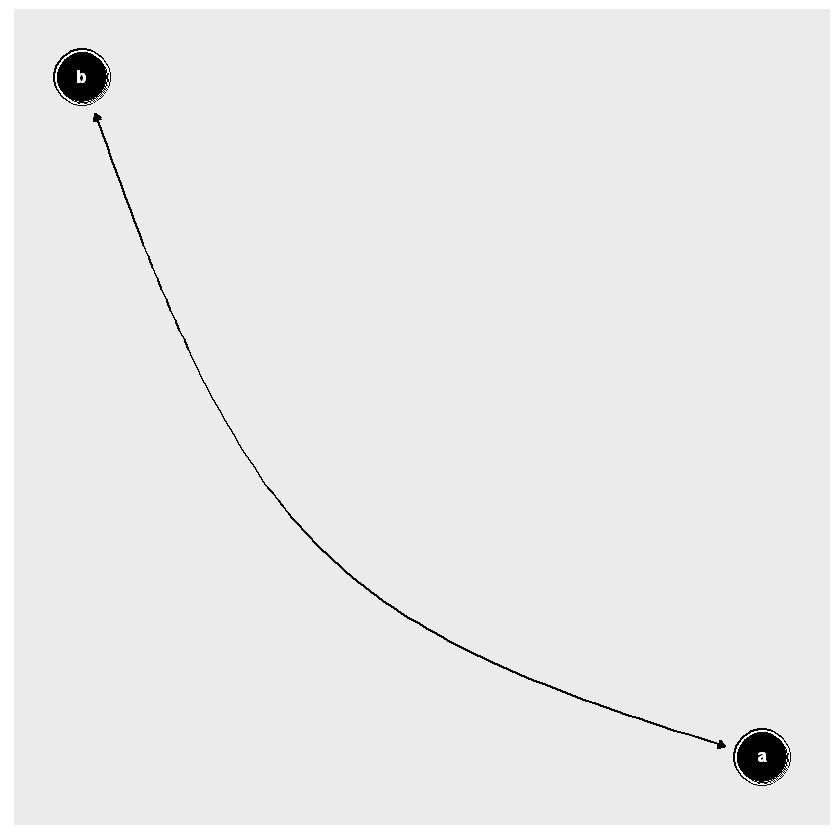

In [5]:
# bi-directed edge
dagify(a ~~ b) %>% 
  ggdag()

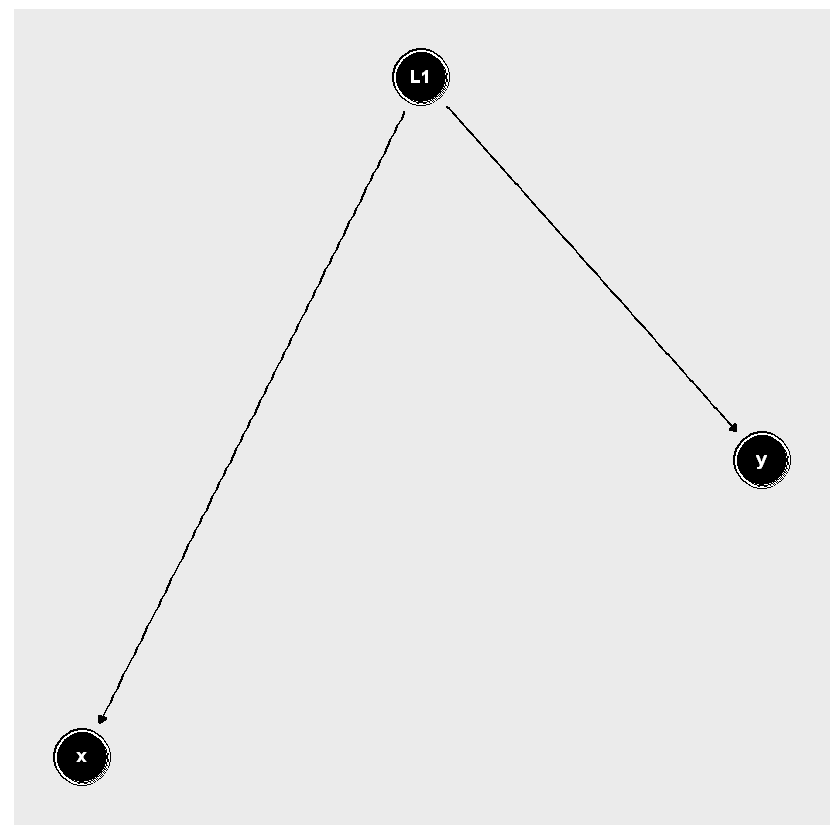

In [4]:
#  canonicalize the DAG: Add the latent variable in to the graph
dagify(y ~~ x) %>% 
  ggdag_canonical() 

A DAG is also acyclic, which means that there are no feedback loops.
Below graph is not DAG.

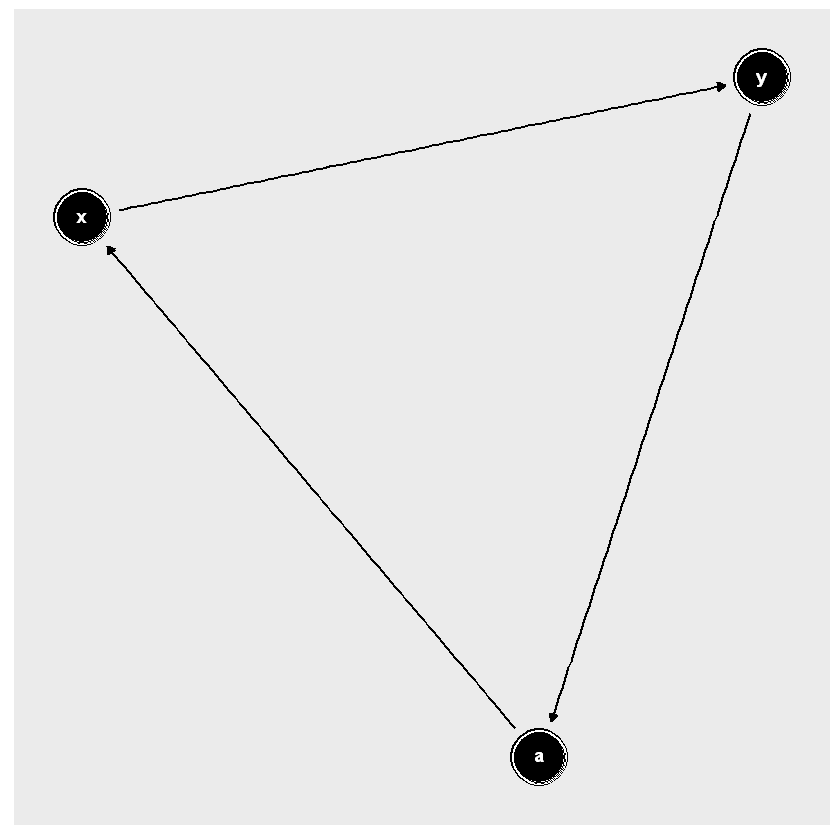

In [7]:
dagify(y ~ x,
       x ~ a,
       a ~ y) %>% 
  ggdag() 

relationship between smoking and cardiac arrest

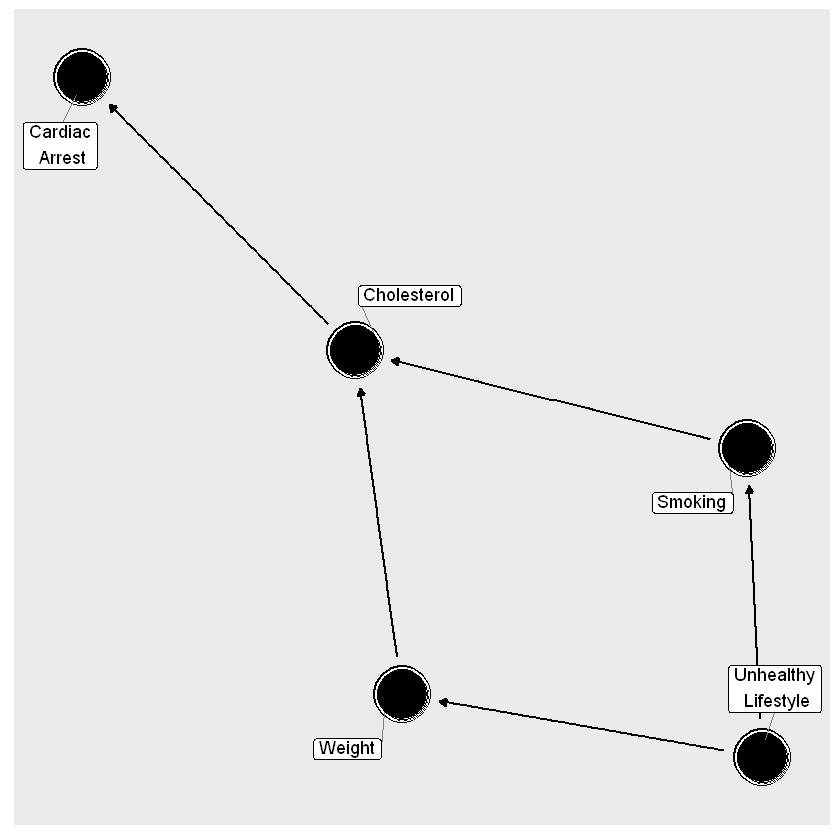

In [8]:
smoking_ca_dag <- dagify(cardiacarrest ~ cholesterol,
       cholesterol ~ smoking + weight,
       smoking ~ unhealthy,
       weight ~ unhealthy,
       labels = c("cardiacarrest" = "Cardiac\n Arrest", 
                  "smoking" = "Smoking",
                  "cholesterol" = "Cholesterol",
                  "unhealthy" = "Unhealthy\n Lifestyle",
                  "weight" = "Weight"),
       latent = "unhealthy",
       exposure = "smoking",
       outcome = "cardiacarrest")

ggdag(smoking_ca_dag, text = FALSE, use_labels = "label")

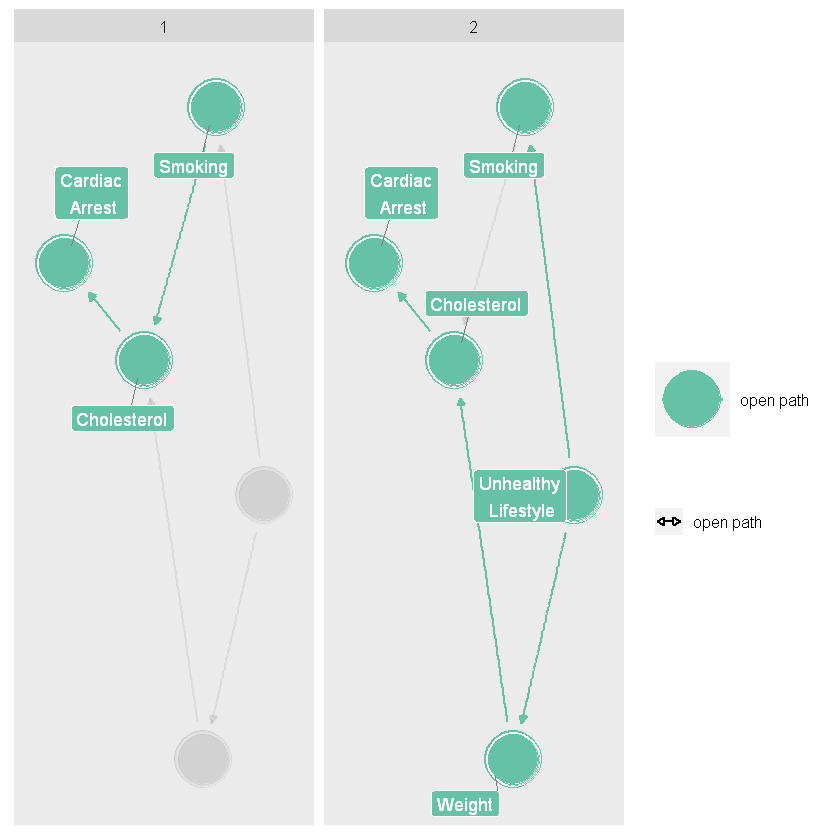

In [9]:
ggdag_paths(smoking_ca_dag, text = FALSE, use_labels = "label")

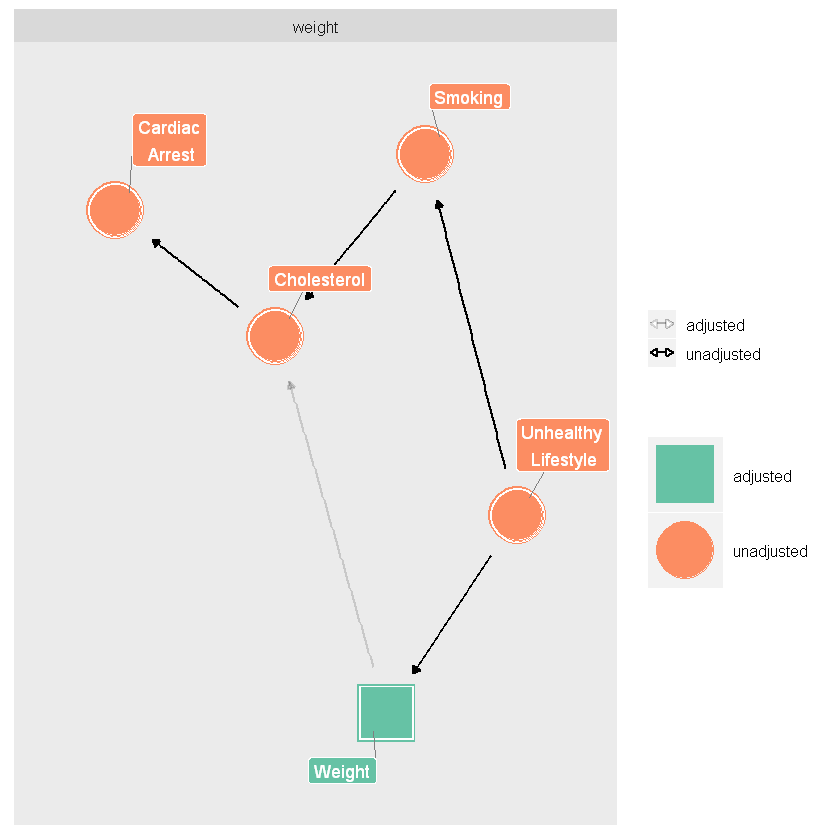

In [10]:
ggdag_adjustment_set(smoking_ca_dag, text = FALSE, use_labels = "label")

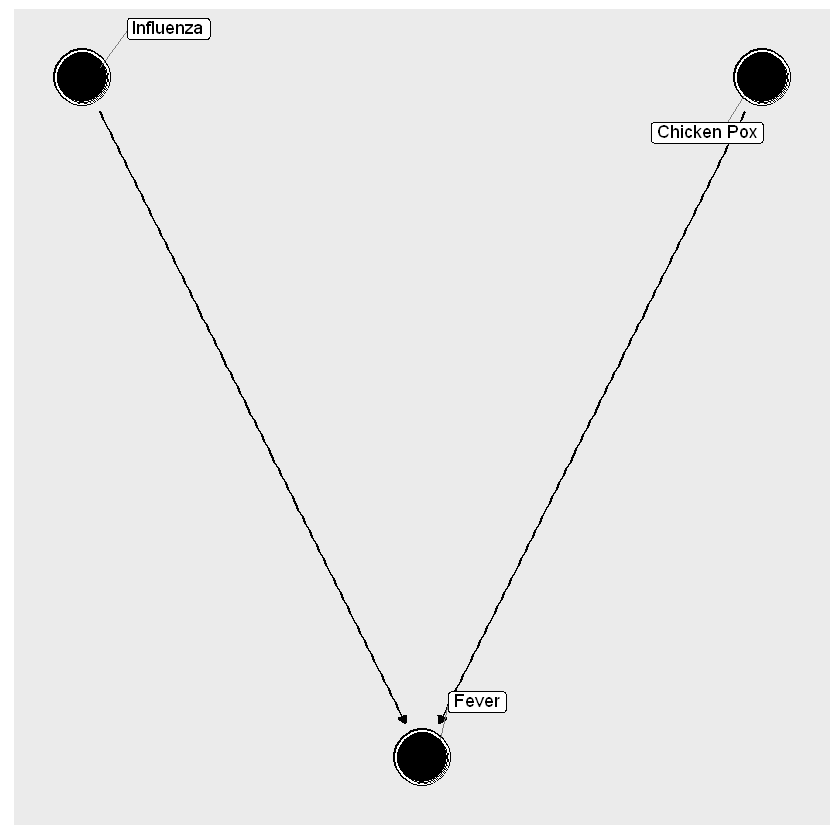

In [11]:
fever_dag <- collider_triangle(x = "Influenza", 
                  y = "Chicken Pox", 
                  m = "Fever") 

ggdag(fever_dag, text = FALSE, use_labels = "label")

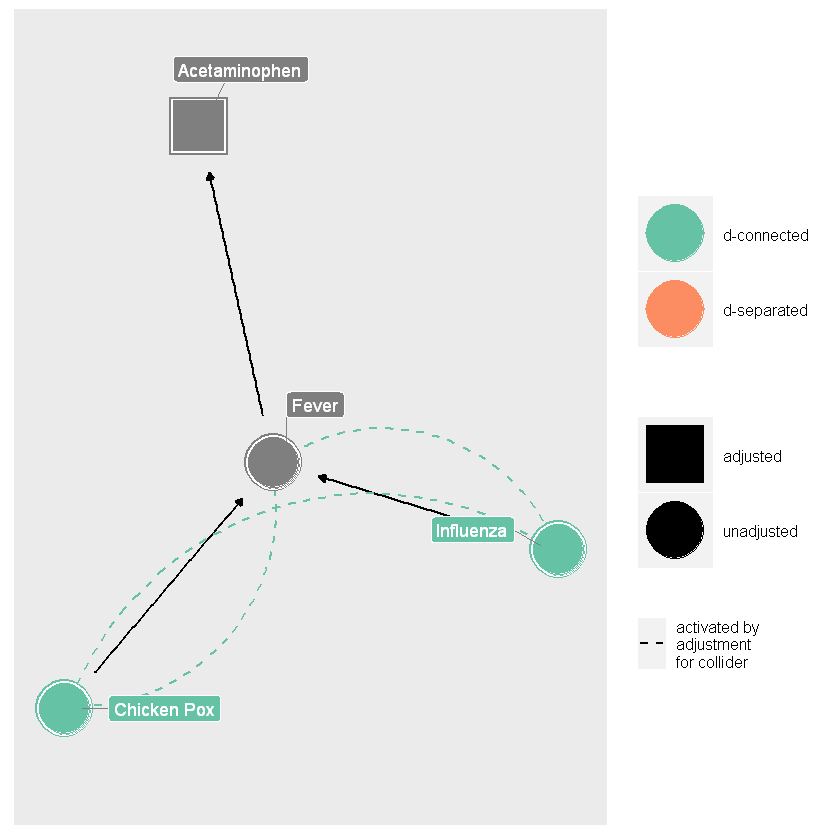

In [12]:
dagify(fever ~ flu + pox, 
        acetaminophen ~ fever,
        labels = c("flu" = "Influenza",
                   "pox" = "Chicken Pox",
                   "fever" = "Fever",
                   "acetaminophen" = "Acetaminophen")) %>% 
ggdag_dseparated(from = "flu", to = "pox", controlling_for = "acetaminophen",
                 text = FALSE, use_labels = "label")